# The netCDF data format

***

## Introduction - What is netCDF?

- Unidata’s Network Common Data Form (netCDF) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data
- documentation: https://www.unidata.ucar.edu/software/netcdf/
- that is a standard for **geoscientific array oriented data** that data centers accept.

Why do we need netCDF?

- __Self-Describing__: netCDF file includes information about the data it contains.
- __Portable__: A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
- __Scalable__: A small subset of a large dataset may be accessed efficiently.
- __Appendable__: Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
- __Sharable__: One writer and multiple readers may simultaneously access the same netCDF file.
- __Archivable__: Access to all earlier forms of netCDF data will be supported by current and future versions of the software.


## Example
- Sea surface temperatures collected by the Program for Climate Model Diagnosis & Intercomparison (PCMDI): https://pcmdi.llnl.gov/about.html
- Data source: https://www.unidata.ucar.edu/software/netcdf/examples/files.html
  

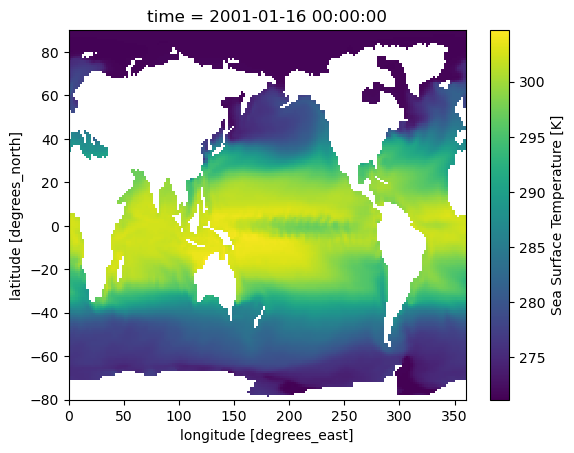

In [1]:
import xarray as xr
ds = xr.open_dataset("../DATA/tos_O1_2001-2002.nc")
ds.tos[0,:,:].plot()

## netCDF content structure
- header with meta information (dimensions, variables, attributes)
- the data show up after the keyword "data:"

## dimensions
- Here we only define the number of elements each dimension has.


## variables
- there are 3 types of variables:
    -  data variables
       - contain the actual data arrays
    -  coordinate variables
        - contain the coordinates of our data arrays, e.g. lat, lon, time
        - should be one-dimensional
        - with values that are strictly increasing or decreasing
        - should not have any missing values
    -  auxiliary coordinate variables
        - can be multidimensional (unlike coordinate variables)
        - do not have to match their dimension names
        - do not need to have strictly increasing or decreasing values,
        - can include missing values

- You can see on which dimensions these variables depend in the **brackets** behind the variable name.


## attributes
- Each variable has **attributes** such as units, and standard_name, which define meta information about these variables
- At the end of the header, we can specify **global attributes** describing **meta data for the entire data set** such as a description, a title, contact persons, website, references, etc.

In [2]:
!ncdump -h ../DATA/tos_O1_2001-2002.nc

netcdf tos_O1_2001-2002 {
dimensions:
	lon = 180 ;
	lat = 170 ;
	time = UNLIMITED ; // (24 currently)
	bnds = 2 ;
variables:
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
		lon:original_units = "degrees_east" ;
	double lon_bnds(lon, bnds) ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
		lat:original_units = "degrees_north" ;
	double lat_bnds(lat, bnds) ;
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 2001-1-1" ;
		time:axis = "T" ;
		time:calendar = "360_day" ;
		time:bounds = "time_bnds" ;
		time:original_units = "seconds since 2001-1-1" ;
	double time_bnds(time, bnds) ;
	float tos(time, lat, lon) ;
		tos:standard_name = "sea_surface_temperature" ;
		tos:long_name = "Sea Surface Temperature"

## dimensions
- In our example we have 4 dimensions **lat, lon, time, bnds**

## variables
-  data variables
   - in our example **tos**
   - the data variable tos depends on time, lat, lon
-  coordinate variables
    - in our example **lat, lon, time**
    - lat, lon, time are all one dimensional
    - the unlimited dimension will correspond with the slowest-varying dimension, in our case time
-  auxiliary coordinate variables
    - in our example **lat_bnds, lon_bnds, time_bnds**
    - lat_bnds, etc. are two dimensional


## some example variables:
### lat, lon
- At first we look at the spatial variable lon, which has the data type float:
    - The main attributes (the names after the colon) are
        - **units**, in this case **"degrees_north"**
        - **standard_name**: a standardized name, in this case **"longitude"**

```yaml
    double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
		lon:original_units = "degrees_east" ;
```                

### time
- Then, we look at the temporal variable time with data type double:
    - The main attributes are again
        - **units**, which show here a specific format:
            - it is always a **temporal interval since a certain time origin**, in this case days since 2001-1-1
        - **standard_name**: in this case **"time"**

```yaml
    double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 2001-1-1" ;
		time:axis = "T" ;
		time:calendar = "360_day" ;
		time:bounds = "time_bnds" ;
		time:original_units = "seconds since 2001-1-1" ;
```                

### tos
- Now, the most important variable containing the 3D field of air temperature values
    - in front of the variable name you can find the data type of this variable, in this case **float**
    - important attributes:
        - **units**, in this case **"K"** meaning Kelvin
        - there is the **standard_name** "sea_surface_temperature"
        - and there is called **_FillValue**: everywhere in the 3D field where are no values, they used the value **1.e+20**

```yaml
    float tos(time, lat, lon) ;
		tos:standard_name = "sea_surface_temperature" ;
		tos:long_name = "Sea Surface Temperature" ;
		tos:units = "K" ;
		tos:cell_methods = "time: mean (interval: 30 days)" ;
		tos:_FillValue = 1.e+20f ;
		tos:missing_value = 1.e+20f ;
		tos:original_name = "sosstsst" ;
		tos:original_units = "degC" ;
		tos:history = " At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;" ;
```                

## global attributes

```yaml
    // global attributes:
        :title = "IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment" ;
		:institution = "IPSL (Institut Pierre Simon Laplace, Paris, France)" ;
		:source = "IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v" ;
		:contact = "Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr" ;
		:project_id = "IPCC Fourth Assessment" ;
		:table_id = "Table O1 (13 November 2004)" ;
		:experiment_id = "SRES A2 experiment" ;
		:realization = 1 ;
		:cmor_version = 0.96f ;
		:Conventions = "CF-1.0" ;
		:history = "YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements" ;
		:references = "Dufresne et al, Journal of Climate, 2015, vol XX, p 136" ;
		:comment = "Test drive" ;

```                

## data
- After the header containing meta data, the **actual data values** follow after the **keyword "data:"** 
- Here you can see an excerpt of the values for lon, time, time_bnds and tos

```yaml
 data:

 lon = 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 
    39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 
    75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 
    109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 
    137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 
    165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 
    193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 
    221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 
    249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 
    277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 
    305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 
    333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359 ;
    
...

time = 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345, 375, 405, 
    435, 465, 495, 525, 555, 585, 615, 645, 675, 705 ;

 time_bnds =
  0, 30,
  30, 60,
  60, 90,
  90, 120,
  120, 150,
  150, 180,
  180, 210,
  210, 240,
  240, 270,
  270, 300,
  300, 330,
  330, 360,
  360, 390,
  390, 420,
  420, 450,
  450, 480,
  480, 510,
  510, 540,
  540, 570,
  570, 600,
  600, 630,
  630, 660,
  660, 690,
  690, 720 ;

 tos =
  _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _,
  _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 275.8637, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _,
  _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, 275.6657, 275.8596, 276.042, 276.1425, 
    276.1662, 276.1198, 276.0396, 275.9248, 275.787, 275.686, 275.5566, 
    275.3785, 275.1796, 274.9005, 274.5688, 274.108, 273.39, 272.6334, 
    272.0998, 271.3627, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, 272.4681, 271.1732, 271.1732, 271.1732, 271.1736, 
    271.1736, 271.5586, 272.0218, 272.4012, 272.5677, 272.4937, 272.2816, 
    271.9929, 271.6465, 271.3219, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 

    ...


}
```                

## netCDF command line tool ncdump
- ncdump 
    - for getting the ASCII output of the binary content 
    - ncdump -h filename.nc (show only header)
    - ncdump filename.nc (show entire file, that's how I created the example above)
    - documentation: https://docs.unidata.ucar.edu/nug/current/netcdf_utilities_guide.html